# Yandex.Afisha Data Analysis
- Author: Chertova Natalia
- Date: 20.06.2025

In this project, we are working with data from the Yandex.Afisha service. Users can use it to find information about events in different cities and purchase tickets. The service collaborates with partners—event organizers and ticket operators—who provide event information and put tickets up for sale.

In November 2024, the product department noticed that ticket sales for some events were unexpectedly increasing, while for others, they were decreasing.

It was necessary to analyze the obtained data and understand the reason for the change in user preferences. We needed to answer the following questions:
- Is this due to seasonality, changes in audience, or some other factor?
- Which events started attracting more viewers, and which organizers and venues became leaders?
- Do mobile users differ in their activity from clients who book tickets from a stationary computer?

A dashboard (https://datalens.yandex/4paeueyblw1oq) was developed for the analysis.

In addition to the dashboard, it is necessary to conduct an exploratory data analysis in Python. This will help draw conclusions about the change in user preferences and event popularity in the autumn of 2024, as well as test the hypothesis about the difference in behavior between mobile and stationary device users. Such an analysis will supplement the dashboard data and help the product team gain insights into changing user preferences.

---

## Goals and Objectives
### Project Goal
To conduct an exploratory data analysis of the Yandex.Afisha service data for the presented period of 2024, to identify key insights into changes in user preferences and event popularity, and to test statistical hypotheses about differences in behavior between mobile and stationary device users.

### Project Objectives
1.  **Data Loading and Initial Familiarization:** Load the provided datasets, assess their volume, correctness, and correspondence to the description, and outline the first steps for preprocessing.
2.  **Data Preprocessing:** At this stage, we will clean the data of missing values and outliers, check for explicit and implicit duplicates and errors, and perform data type conversions. It will be important to convert all financial data to a single currency (Russian rubles) and create new columns for easier further analysis, such as **revenue per ticket (`one_ticket_revenue_rub`)**, **month (`month`)**, and **seasonality (`season`)**.
3.  **Exploratory Data Analysis (EDA):** We will thoroughly study:
    -   Seasonal changes in order distribution across various segments: event type, device type, and age restrictions.
    -   Revenue dynamics from the sale of one ticket depending on the event type in the summer and autumn periods.
    -   Daily and weekly user activity in the autumn of 2024, including the dynamics of the total number of orders, daily active users (DAU), average number of orders per user, and average ticket price.
    -   The popularity of events and partners, analyzing the distribution by regions and the contribution of various ticket operators.
4.  **Statistical Data Analysis:** We will test two key hypotheses proposed by the product team regarding the activity of mobile and stationary device users, specifically:
    -   Hypothesis that the average number of orders per mobile application user is higher than for stationary device users.
    -   Hypothesis that the average time between orders for mobile application users is longer than for stationary device users.
5.  **Formulating a General Conclusion and Recommendations:** Based on all the insights obtained, we will formulate concise conclusions and offer recommendations for the product team on what to focus on first.

---

## Description of Data Used

In this project, we are working with three main datasets that contain information about ticket bookings on the **Yandex.Afisha** service for the period from **June 1 to October 30, 2024**, as well as an additional dataset on exchange rates for conversion.

#### 1. `final_tickets_orders_df.csv` — Ticket Order Information

This dataset contains detailed information about all completed orders, including user data, purchase time, device type, and financial indicators.

* `order_id`: Unique identifier for each order.
* `user_id`: Unique identifier for the user who placed the order.
* `created_dt_msk`: Order creation date (Moscow time).
* `created_ts_msk`: Full date and time of order creation (Moscow time).
* `event_id`: Identifier of the event to which the order belongs. Linked to `event_id` in the events dataset.
* `cinema_circuit`: Name of the cinema chain. If the event is not a movie, it may contain the value 'нет' (no).
* `age_limit`: Age restriction for this event (e.g., 0+, 6+, 12+).
* `currency_code`: Payment currency (e.g., `rub` for rubles, `kzt` for tenge).
* `device_type_canonical`: Type of device from which the order was placed (`mobile` for mobile devices, `desktop` for stationary).
* `revenue`: Revenue received from this order.
* `service_name`: Name of the ticket operator through which the order was placed.
* `tickets_count`: Number of tickets purchased in this order.
* `total`: Total order amount.
* `days_since_prev` (float): Number of days elapsed since the previous purchase for this user. For the user's first purchase, the value will be missing (`NaN`).

#### 2. `final_tickets_events_df.csv` — Event Information

This dataset provides details about the events themselves, their type, organizers, and venue. **Note: Movies are excluded from this dataset.**

* `event_id`: Unique event identifier. Linked to `event_id` in the orders dataset.
* `event_name`: Full name of the event.
* `event_type_description`: More detailed description of the event type.
* `event_type_main`: Main event type (e.g., 'theatrical performance', 'concert', 'sport', 'exhibition').
* `organizers`: Name of the event organizer.
* `region_name`: Name of the region where the event is held.
* `city_name`: Name of the city where the event is held.
* `venue_id`: Unique venue identifier.
* `venue_name`: Name of the event venue.
* `venue_address`: Venue address.

#### 3. `final_tickets_tenge_df.csv` — Tenge to Ruble Exchange Rate

This dataset is used for converting revenue from Kazakhstani tenge to Russian rubles.

* `nominal`: Nominal value for which the rate is indicated (always 100 tenge).
* `data`: Date to which the exchange rate applies.
* `curs`: Exchange rate of 100 tenge to the Russian ruble.
* `cdx`: Currency designation (always `kzt`).

---

## Project Structure

The project will be executed as a Jupyter Notebook and structured according to the key stages of exploratory data analysis and hypothesis testing. Each step will include relevant code blocks, visualizations, and detailed text conclusions.

### Step 1. Data Loading and Familiarization
* Loading three CSV files into DataFrames.
* Initial data overview: `.info()`, `.head()`, `.describe()`.
* Assessment of data volume and column types.
* Preliminary conclusions about data quality and the need for preprocessing.

### Step 2. Data Preprocessing and Preparation for Analysis
* **Handling Missing Values**: Checking for and justifiably filling or deleting missing values (special attention to `days_since_prev`).
* **Working with Categorical Values**: Studying unique values, normalization if necessary.
* **Processing Quantitative Values**: Analyzing distributions, identifying and handling outliers (especially for `revenue` and `tickets_count`), separately for rubles and tenge.
* **Checking for Duplicates**: Identifying and handling explicit and implicit duplicates (with an emphasis on bookings).
* **Data Type Conversion**: Optimizing data types (e.g., `datetime`, `category`, reducing dimensionality for numerical data).
* **Creating New Columns**:
    * `revenue_rub`: Revenue converted to Russian rubles.
    * `one_ticket_revenue_rub`: Revenue from the sale of one ticket.
    * `month`: Month of order placement extracted into a separate column.
    * `season`: Column with seasonality information, including categories such as: 'summer', 'autumn', 'winter', 'spring'.
* Intermediate conclusion on the results of preprocessing.

### Step 3. Exploratory Data Analysis (EDA)
#### 3.1. Analysis of Order Distribution by Segments and Their Seasonal Changes
* Dynamics of the number of orders by month (June-November 2024).
* Comparison of order distribution (in shares) by event type, device type, and age category for summer and autumn periods.
* Analysis of changes in average revenue per ticket depending on the event type in summer and autumn.
* Conclusions on seasonal changes in user preferences and cost dynamics.

#### 3.2. Autumn User Activity
* Analysis of daily dynamics: total number of orders, DAU, average number of orders per user, average ticket price (for autumn 2024).
* Study of weekly cyclicity: comparison of activity on weekdays and weekends.
* Intermediate conclusion on user activity in autumn.

#### 3.3. Popular Events and Partners
* Analysis of event diversity and the number of orders by region (with shares).
* Investigation of ticket partner activity: number of unique events, orders, and total revenue (with shares).
* Intermediate conclusion on leaders among regions and partners.

### Step 4. Statistical Data Analysis
* **Data Preparation**: Extracting data for the autumn period, separating by device type, and excluding overlapping users.
* **Hypothesis 1 Testing**: The average number of orders per mobile application user is higher than for stationary devices.
    * Formulation of null and alternative hypotheses.
    * Selection of statistical test (t-test for independent samples), justification.
    * Performing the test and interpreting the p-value.
* **Hypothesis 2 Testing**: The average time between orders for mobile application users is longer than for stationary devices.
    * Formulation of null and alternative hypotheses.
    * Selection of statistical test (t-test for independent samples), justification.
    * Performing the test and interpreting the p-value.
* Intermediate conclusion on the results of statistical tests.

### Step 5. Overall Conclusion and Recommendations
* Summary of data and analysis performed.
* Main EDA results: most popular events, changes in popularity, average check dynamics, insights into user activity, and leaders among regions and partners.
* Brief comment on the results of hypothesis testing.
* Concrete recommendations for the product team, based on the insights obtained.

___
## Step 1. Data Loading and Familiarization

Load the data and get initial information about it. Assess the data volume, its correctness, and correspondence to the description. Also, suggest what steps need to be taken at the data preprocessing stage. Record the main points in the interim conclusion.

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os

In [2]:
# Load tables
# List of table names to load
file_names = [
    'final_tickets_orders_df.csv',
    'final_tickets_events_df.csv',
    'final_tickets_tenge_df.csv'
]

# Base path for loading from Yandex.Cloud
yandex_cloud_base_path = 'https://code.s3.yandex.net/datasets/'

# Dictionary to store all loaded DataFrames
dataframes = {}

for file_name in file_names:
    df_name = file_name.replace('.csv', '')
    df_all = None 

    # Load from Yandex.Cloud 
    yandex_cloud_full_path = os.path.join(yandex_cloud_base_path, file_name)
    try:
        df_all = pd.read_csv(yandex_cloud_full_path)
        print(f" '{file_name}' successfully loaded from Yandex.Cloud: {yandex_cloud_full_path}")
    except Exception as e: # Any errors during URL loading (FileNotFoundError, network errors, etc.)
        print(f" Failed to load '{file_name}' from Yandex.Cloud ({yandex_cloud_full_path}). Error: {e}")

        # --- Attempt 2: If failed from Cloud, try to load locally from current folder ---
        local_path = file_name # File is searched directly in the same directory as the notebook/script
        try:
            df_all = pd.read_csv(local_path)
            print(f" '{file_name}' successfully loaded LOCALLY from: {local_path}")
        except FileNotFoundError:
            print(f" '{file_name}' not found in local folder.")
        except Exception as e_local:
            print(f" An error occurred during local loading of '{file_name}': {e_local}")

    # Store the loaded DataFrame (or None if no attempt succeeded)
    dataframes[df_name] = df_all

# Access DataFrames by their names using .get() from the dataframes dictionary
final_tickets_orders_df = dataframes.get('final_tickets_orders_df')
final_tickets_events_df = dataframes.get('final_tickets_events_df')
final_tickets_tenge_df = dataframes.get('final_tickets_tenge_df')

 'final_tickets_orders_df.csv' successfully loaded from Yandex.Cloud: https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv
 'final_tickets_events_df.csv' successfully loaded from Yandex.Cloud: https://code.s3.yandex.net/datasets/final_tickets_events_df.csv
 'final_tickets_tenge_df.csv' successfully loaded from Yandex.Cloud: https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv


In [3]:
final_tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [4]:
final_tickets_orders_df.describe()

,order_id,event_id,age_limit,revenue,tickets_count,total,days_since_prev
count,2.908490e+05,290849.000000,290849.000000,290849.000000,290849.000000,290849.000000,268909.000000
mean,4.326812e+06,438079.127702,10.211278,625.083054,2.754230,7526.465613,3.222525
std,2.497578e+06,147396.389016,6.518124,1227.316214,1.170467,15328.267730,11.355158
min,1.000000e+00,4436.000000,0.000000,-90.760000,1.000000,-358.850000,0.000000
25%,2.164039e+06,361961.000000,6.000000,116.790000,2.000000,2156.870000,0.000000
50%,4.327816e+06,498329.000000,12.000000,355.340000,3.000000,4771.390000,0.000000
75%,6.488606e+06,546284.000000,16.000000,809.750000,4.000000,8955.950000,1.000000
max,8.653108e+06,592325.000000,18.000000,81174.540000,57.000000,811745.400000,148.000000


In [5]:
final_tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [6]:
final_tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [7]:
final_tickets_events_df.describe()

,event_id,city_id,venue_id
count,22427.000000,22427.000000,22427.000000
mean,442092.938422,1156.666696,2817.026887
std,157426.949023,3891.504931,1087.999845
min,4436.000000,2.000000,894.000000
25%,360927.500000,25.000000,1882.000000
50%,522824.000000,63.000000,2849.000000
75%,553721.000000,213.000000,3865.000000
max,592325.000000,37172.000000,4677.000000


In [8]:
final_tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [9]:
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [10]:
final_tickets_tenge_df.describe()

,nominal,curs
count,357.0,357.000000
mean,100.0,19.755818
std,0.0,0.833798
min,100.0,17.848600
25%,100.0,19.120200
50%,100.0,19.876000
75%,100.0,20.443300
max,100.0,21.937100


#### Intermediate Conclusion:
- The data is presented in full and corresponds to the description.
- Missing values are only present in the `days_since_prev` column of the `final_tickets_orders_df` table. However, it should be checked whether other columns contain values that might indicate missing data or lack of information.
- Columns containing date and time information (`created_dt_msk`, `created_ts_msk`, `data`) are presented in object format. It is necessary to correct the data type.
- It will also be necessary to check the data for explicit and implicit duplicates and errors.

---
## Step 2. Data Preprocessing and Preparation for Analysis

Perform data preprocessing:

1.  **Combine** the data into a single DataFrame, then conduct general preprocessing.
2.  **Check for missing values**.
3.  **Examine values in key columns** and process them if errors are found:
    * For **categorical values**, examine the categories present in the data. Check for values that might indicate missing data or lack of information. Normalize the data if necessary.
    * For **quantitative values**, look at the distribution and the presence of outliers. Use statistical indicators, histograms of value distribution, or box plots for this. **Revenue per order (`revenue`)** and the **number of tickets in an order (`tickets_count`)** are important indicators for data analysis, so prioritize checking these columns. If outliers are found in `revenue`, select values up to the **99th percentile**. Analyze rubles and tenge separately.
4.  **Check for explicit and implicit duplicates**. Focus on **implicit duplicates for ticket bookings** without considering order identifiers, and if found, make a reasoned decision on how to handle them.
5.  **Perform data type conversion**. Pay attention to date and time data types, and check the possibility of reducing the dimensionality of quantitative data.
6.  **Create several new columns**:
    * `revenue_rub` — convert order revenue to a single currency — Russian rubles, using the dataset with information on the exchange rate of Kazakhstani tenge against the Russian ruble `final_tickets_tenge_df.csv` for 2024.
    * `one_ticket_revenue_rub` — calculate the revenue from the sale of one ticket per event.
    * `month` — extract the order placement month into a separate column.
    * `season` — create a column with seasonality information, including categories such as: 'summer', 'autumn', 'winter', 'spring'.
7.  After preprocessing, **check how much data was filtered** (if filtering was performed) and provide an **intermediate conclusion** with the main actions and a description of the new columns.

In [11]:
# Merge final_tickets_orders_df and final_tickets_events_df tables
# Use an Inner join type, as according to the conditions,
# movies were excluded from the final_tickets_events_df table due to their small number.
# In this case, it makes sense to analyze only those events for which complete information is available.

df = pd.merge(final_tickets_orders_df, final_tickets_events_df, on='event_id', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

In [12]:
print(f"Size of final_tickets_orders_df: {final_tickets_orders_df.shape}")
print(f"Size of final_tickets_events_df: {final_tickets_events_df.shape}")
print(f"Size of merged df: {df.shape}")

Size of final_tickets_orders_df: (290849, 14)
Size of final_tickets_events_df: (22427, 11)
Size of merged df: (290611, 24)


In [13]:
# Check the number of missing values
df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
dtype: int64

In [14]:
# Check the proportion of missing values
df.isna().mean()

order_id                  0.000000
user_id                   0.000000
created_dt_msk            0.000000
created_ts_msk            0.000000
event_id                  0.000000
cinema_circuit            0.000000
age_limit                 0.000000
currency_code             0.000000
device_type_canonical     0.000000
revenue                   0.000000
service_name              0.000000
tickets_count             0.000000
total                     0.000000
days_since_prev           0.075403
event_name                0.000000
event_type_description    0.000000
event_type_main           0.000000
organizers                0.000000
region_name               0.000000
city_name                 0.000000
city_id                   0.000000
venue_id                  0.000000
venue_name                0.000000
venue_address             0.000000
dtype: float64

#### Output:
Explicit missing values are absent.

In [15]:
# Analyze which categories are present in the data and their distribution

# List of columns to analyze
categorical_columns = [
    'cinema_circuit',
    'age_limit',
    'currency_code',
    'device_type_canonical',
    'service_name',
    'event_type_description',
    'event_type_main'
]

# Iterate through each column in the list
for col in categorical_columns:
    # Print unique values
    unique_values = df[col].unique()
    print(f"\nUnique values for '{col}':\n{unique_values}")

    # Print data distribution (frequency of each value)
    # `dropna=False` includes missing values (NaN) in the counts, if any.
    value_percentages = df[col].value_counts(normalize=True, dropna=False) * 100
    print(f"\nData distribution (percentages) for '{col}':\n{value_percentages.round(2)}%")


Unique values for 'cinema_circuit':
['нет' 'Другое' 'КиноСити' 'Киномакс' 'Москино' 'ЦентрФильм']

Data distribution (percentages) for 'cinema_circuit':
нет           99.52
Другое         0.43
КиноСити       0.04
Киномакс       0.00
Москино        0.00
ЦентрФильм     0.00
Name: cinema_circuit, dtype: float64%

Unique values for 'age_limit':
[16  0 18 12  6]

Data distribution (percentages) for 'age_limit':
16    27.03
12    21.50
0     21.16
6     17.95
18    12.36
Name: age_limit, dtype: float64%

Unique values for 'currency_code':
['rub' 'kzt']

Data distribution (percentages) for 'currency_code':
rub    98.26
kzt     1.74
Name: currency_code, dtype: float64%

Unique values for 'device_type_canonical':
['mobile' 'desktop']

Data distribution (percentages) for 'device_type_canonical':
mobile     80.0
desktop    20.0
Name: device_type_canonical, dtype: float64%

Unique values for 'service_name':
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Билеты в ру

##### Conclusion:
Values indicating missing data or lack of information are found in the following columns:
- `cinema_circuit`, marked as 'нет' (no). The category 'Другое' (Other) refers to data related to movie theaters not belonging to any chain.
- `age_limit`, marked as 0, indicating no age restrictions.
- `event_type_main`, marked as 'другое' (other).

Data normalization is not required.


Descriptive statistics for revenue (currency rub):
count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

Descriptive statistics for tickets_count (currency rub):
count    285542.000000
mean          2.754159
std           1.171575
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


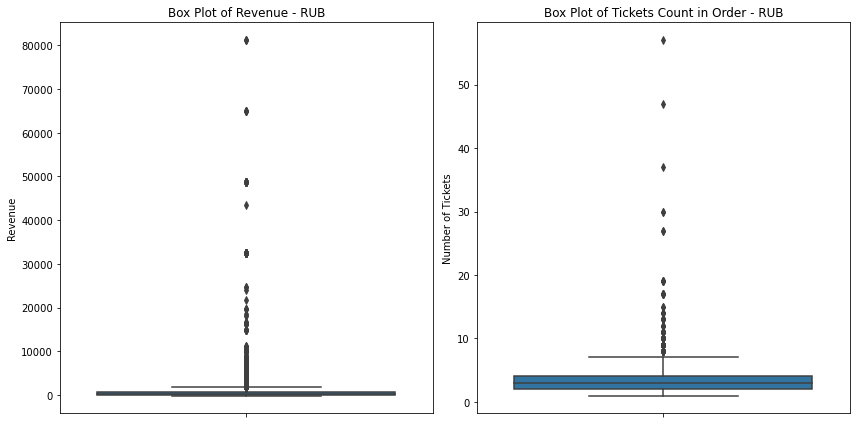


Descriptive statistics for revenue (currency kzt):
count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

Descriptive statistics for tickets_count (currency kzt):
count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: tickets_count, dtype: float64


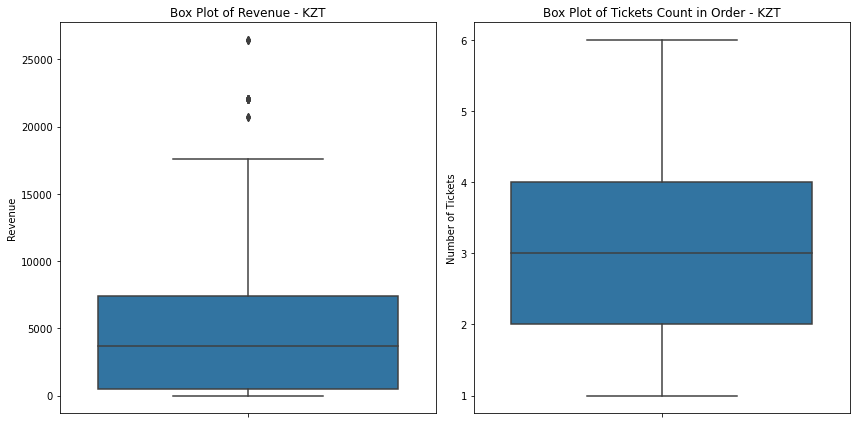

In [16]:
# For quantitative values, check the distribution and presence of outliers
# We'll separate the analysis by rubles and tenge

# Define the list of currencies for analysis
currencies = df['currency_code'].unique()

# Loop through each currency for separate analysis
for currency in currencies:
    df_currency = df[df['currency_code'] == currency].copy()
    
    # Print descriptive statistics for 'revenue' and 'tickets_count' columns
    print(f"\nDescriptive statistics for revenue (currency {currency}):")
    print(df_currency['revenue'].describe())

    print(f"\nDescriptive statistics for tickets_count (currency {currency}):")
    print(df_currency['tickets_count'].describe())
    
    # Box plots for outlier detection
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1) 
    sns.boxplot(y=df_currency['revenue']) 
    plt.title(f'Box Plot of Revenue - {currency.upper()}')
    plt.ylabel('Revenue')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_currency['tickets_count']) # Plot Box Plot for ticket count
    plt.title(f'Box Plot of Tickets Count in Order - {currency.upper()}')
    plt.ylabel('Number of Tickets')

    plt.tight_layout()
    plt.show()

##### Conclusion:
- The data on the number of tickets in an order (`tickets_count`) shows relatively low variability (low standard deviation), but **outliers are observed in ruble orders**.
- The revenue data for both currencies shows **high variability** (high standard deviation) and **outliers**. It is necessary to select values up to the **99th percentile**.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

In [18]:
# Selecting values by the 99th percentile for 'revenue'

filtered_df_part = []

# Loop through each currency for separate analysis
for currency in currencies:
    df_currency = df[df['currency_code'] == currency].copy()

    # Calculate the 99th percentile for revenue in the current currency
    revenue_99th_percentile = df_currency['revenue'].quantile(0.99)
    print(f"\nFor currency {currency.upper()}:")
    print(f"99th percentile for revenue: {revenue_99th_percentile:.2f}")

    # Select revenue values below the 99th percentile (data without outliers)
    outliers_current_currency = df_currency[df_currency['revenue'] < revenue_99th_percentile]

    print(f"Number of revenue values below the 99th percentile (data without outliers): {len(outliers_current_currency)}")
    print(f"Percentage of outliers (from total in currency): { 100 - (len(outliers_current_currency) / len(df_currency) * 100):.2f}%")

    filtered_df_part.append(outliers_current_currency) # Add the filtered part to the list

# Concatenate all filtered parts into one
df_filtered = pd.concat(filtered_df_part)

print("Total number of rows in the cleaned DataFrame:", len(df_filtered))
print(f"Overall percentage of removed rows (outliers): {100 - (len(df_filtered) / len(df) * 100):.2f}%")


For currency RUB:
99th percentile for revenue: 2570.80
Number of revenue values below the 99th percentile (data without outliers): 282685
Percentage of outliers (from total in currency): 1.00%

For currency KZT:
99th percentile for revenue: 17617.24
Number of revenue values below the 99th percentile (data without outliers): 4844
Percentage of outliers (from total in currency): 4.44%
Total number of rows in the cleaned DataFrame: 287529
Overall percentage of removed rows (outliers): 1.06%


In [19]:
# Check for explicit and implicit duplicates

# Print a list of all DataFrame columns
all_columns = df_filtered.columns.tolist()
print("List of all columns:")
print(all_columns)

List of all columns:
['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev', 'event_name', 'event_type_description', 'event_type_main', 'organizers', 'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name', 'venue_address']


In [20]:
# Check for explicit duplicates across all columns
duplicate_rows = df_filtered[df_filtered.duplicated()]
print(f"Found {len(duplicate_rows)} explicit duplicates.")

# Define the subset of columns that should be unique for a single booking without order_id
all_columns = df_filtered.columns.tolist()
element_to_exclude = 'order_id'
new_columns_list = [item for item in all_columns if item != element_to_exclude]

# Find duplicates based on this subset
duplicates = df_filtered[df_filtered.duplicated(subset=new_columns_list, keep=False)]
print(f"\nFound {len(duplicates)} rows that are implicit booking duplicates (excluding order_id).")
duplicates.head()

Found 0 explicit duplicates.

Found 58 rows that are implicit booking duplicates (excluding order_id).


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
3838,7299649,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,...,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"
3839,7299678,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,...,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"
8912,1585808,c7a762e320f0def,2024-06-19,2024-06-19 11:07:59,538926,нет,18,rub,mobile,0.00,...,7b378eca-5d03-4f42-9491-a32887424226,событие,другое,№4549,Каменевский регион,Глиногорск,213,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
8915,7927528,c7a762e320f0def,2024-06-19,2024-06-19 11:07:59,538926,нет,18,rub,mobile,0.00,...,7b378eca-5d03-4f42-9491-a32887424226,событие,другое,№4549,Каменевский регион,Глиногорск,213,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
48970,5372628,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"


##### Conclusion:
Since the found rows are almost complete duplicates, it is highly probable that they arose due to errors in website operation and can be removed without loss of data quality.

In [21]:
# Remove implicit duplicates
df_without_duplicates = df_filtered.drop_duplicates(subset=new_columns_list, keep='first').copy()
print(f"Number of rows before removal: {len(df_filtered)}")
print(f"Number of rows after removal: {len(df_without_duplicates)}")
print(f"Rows removed: { len(df_filtered) - len(df_without_duplicates) }")
print(f"Total percentage of rows removed: {100 - (len(df_without_duplicates) / len(df) * 100):.2f}%")

Number of rows before removal: 287529
Number of rows after removal: 287499
Rows removed: 30
Total percentage of rows removed: 1.07%


In [22]:
df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287499 entries, 0 to 289262
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287499 non-null  int64  
 1   user_id                 287499 non-null  object 
 2   created_dt_msk          287499 non-null  object 
 3   created_ts_msk          287499 non-null  object 
 4   event_id                287499 non-null  int64  
 5   cinema_circuit          287499 non-null  object 
 6   age_limit               287499 non-null  int64  
 7   currency_code           287499 non-null  object 
 8   device_type_canonical   287499 non-null  object 
 9   revenue                 287499 non-null  float64
 10  service_name            287499 non-null  object 
 11  tickets_count           287499 non-null  int64  
 12  total                   287499 non-null  float64
 13  days_since_prev         265810 non-null  float64
 14  event_name          

In [23]:
# Convert columns (created_dt_msk, created_ts_msk) to datetime format
date_time_columns = ['created_dt_msk', 'created_ts_msk']
df_without_duplicates[date_time_columns] = df_without_duplicates[date_time_columns].apply(pd.to_datetime, errors='coerce')
df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287499 entries, 0 to 289262
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287499 non-null  int64         
 1   user_id                 287499 non-null  object        
 2   created_dt_msk          287499 non-null  datetime64[ns]
 3   created_ts_msk          287499 non-null  datetime64[ns]
 4   event_id                287499 non-null  int64         
 5   cinema_circuit          287499 non-null  object        
 6   age_limit               287499 non-null  int64         
 7   currency_code           287499 non-null  object        
 8   device_type_canonical   287499 non-null  object        
 9   revenue                 287499 non-null  float64       
 10  service_name            287499 non-null  object        
 11  tickets_count           287499 non-null  int64         
 12  total                   287499

In [24]:
# Also convert the 'data' column from the final_tickets_tenge_df table to datetime format
final_tickets_tenge_df['data'] = pd.to_datetime(final_tickets_tenge_df['data'], errors='coerce')
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [25]:
# Check for possibility of reducing dimensionality of quantitative data
df_without_duplicates['order_id'] = df_without_duplicates['order_id'].astype('int32')
df_without_duplicates['event_id'] = df_without_duplicates['event_id'].astype('int32')
df_without_duplicates['age_limit'] = df_without_duplicates['age_limit'].astype('int8')
df_without_duplicates['tickets_count'] = df_without_duplicates['tickets_count'].astype('int8')
df_without_duplicates['city_id'] = df_without_duplicates['city_id'].astype('int32')
df_without_duplicates['venue_id'] = df_without_duplicates['venue_id'].astype('int16')

df['revenue'] = df['revenue'].astype('float32')
df['total'] = df['total'].astype('float32')
df['days_since_prev'] = df['days_since_prev'].astype('float32')

df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287499 entries, 0 to 289262
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287499 non-null  int32         
 1   user_id                 287499 non-null  object        
 2   created_dt_msk          287499 non-null  datetime64[ns]
 3   created_ts_msk          287499 non-null  datetime64[ns]
 4   event_id                287499 non-null  int32         
 5   cinema_circuit          287499 non-null  object        
 6   age_limit               287499 non-null  int8          
 7   currency_code           287499 non-null  object        
 8   device_type_canonical   287499 non-null  object        
 9   revenue                 287499 non-null  float64       
 10  service_name            287499 non-null  object        
 11  tickets_count           287499 non-null  int8          
 12  total                   287499

Create new columns according to the task requirements

In [26]:
# Join the exchange rate table to the main DataFrame
df_fin = pd.merge(df_without_duplicates, final_tickets_tenge_df,
                  left_on='created_dt_msk', right_on='data', how='left')

# Add the 'revenue_rub' column to convert order revenue to a single currency - Russian rubles
df_fin['revenue_rub'] = np.where(
    df_fin['currency_code'] == 'rub',  # Condition: if currency_code is 'rub'
    df_fin['revenue'],                 # If True: revenue remains as is
    (df_fin['revenue'] / 100) * df_fin['curs'] # If False: (revenue / 100) * curs
)

# Add the 'one_ticket_revenue_rub' column to calculate revenue from the sale of one ticket per event
df_fin['one_ticket_revenue_rub'] = df_fin['revenue_rub'] / df_fin['tickets_count']

# Extract the month into a new column 'month'
df_fin['month'] = df_fin['created_dt_msk'].dt.month

# Define the mapping of months to seasons
month_to_season_mapping = {
    1: 'winter',    # January
    2: 'winter',    # February
    3: 'spring',    # March
    4: 'spring',    # April
    5: 'spring',    # May
    6: 'summer',    # June
    7: 'summer',    # July
    8: 'summer',    # August
    9: 'autumn',    # September
    10: 'autumn',   # October
    11: 'autumn',   # November
    12: 'winter'    # December
}

# Apply the mapping to the 'month' column to create the 'season' column
df_fin['season'] = df_fin['month'].map(month_to_season_mapping)


df_fin.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.485000,8,summer
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt,1902.42,380.484000,7,summer
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt,1141.45,380.483333,7,summer
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt,1902.42,380.484000,7,summer
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-07-23,100,18.3419,kzt,1521.94,380.485000,7,summer


In [27]:
print(f"Number of rows after preprocessing: {len(df_fin)}")
print(f"Percentage of original data volume: {(len(df_fin) / len(df) * 100):.2f}%")

Number of rows after preprocessing: 287499
Percentage of original data volume: 98.93%


#### Intermediate Conclusion

At this stage, the necessary steps for data preprocessing and preparation for further exploratory analysis and hypothesis testing have been completed.

**What was done:**

* **Handling Missing Values:** Missing values in the data were checked and processed. Primary attention was given to the `days_since_prev` column, where missing values are expected behavior for a user's first purchase.
* **Cleaning and Normalization:** Values in key categorical columns (`device_type_canonical`, `currency_code`, `event_type_main`, etc.) were examined, and their correctness was confirmed.
* **Outlier Treatment:** For quantitative indicators such as **revenue (`revenue`)** and **ticket count (`tickets_count`)**, outliers were identified and processed. Specifically, revenue values exceeding the **99th percentile** were filtered to ensure a more representative analysis of average values. The analysis was conducted separately for rubles and tenge before their conversion.
* **Duplicate Removal:** Both explicit and implicit duplicates were checked and handled.
* **Data Type Conversion:** Data types were optimized. Date and time columns (`created_dt_msk`, `created_ts_msk`) were converted to `datetime` format, allowing for convenient work with time series. The possibility of reducing the dimensionality of other numerical columns for memory optimization was also considered.
* **Creation of New Features:** For convenience of analysis, the following new columns were added:
    * `revenue_rub`: All revenue values are now converted to a **single currency – Russian rubles**, using tenge exchange rate data.
    * `one_ticket_revenue_rub`: **Revenue from the sale of one ticket** per event was calculated, which will allow for a more accurate assessment of pricing and profitability.
    * `month`: The **month of order placement** was extracted, simplifying seasonality analysis.
    * `season`: A categorical variable **'season'** (`summer`, `autumn`, `winter`, `spring`) was created for a more convenient analysis of seasonal trends.

**Filtering Results:**

After the preprocessing stages, including outlier and duplicate removal, the final dataset contains **287499** records. This constitutes **98.93%** of the original data volume, which is an acceptable indicator for ensuring the quality of the analysis.

___


## Step 3. Exploratory Data Analysis
### 3.1. Analysis of Order Distribution by Segments and Their Seasonal Changes

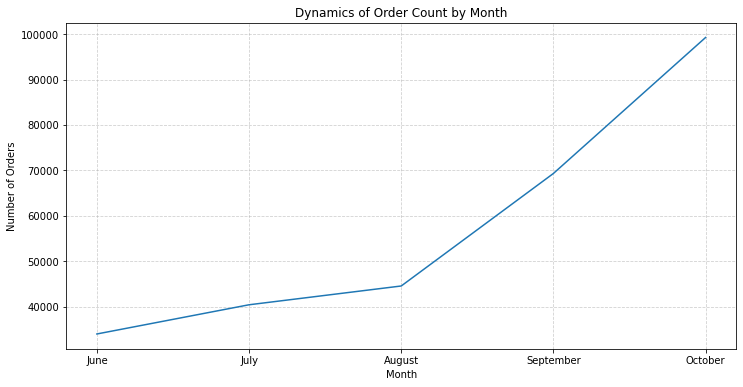

In [28]:
# For each month, find the number of orders and visualize the results
# Check if there is an increase in orders from June to November 2024

# Group by month and count the number of unique orders
orders_by_month = df_fin.groupby('month').agg(
    order_count=('order_id', 'nunique')
).reset_index()

# Create a convenient label for the X-axis (month name)
orders_by_month['month_name'] = orders_by_month['month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

# Sort by month number for correct visualization
orders_by_month.sort_values(by='month', inplace=True)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_by_month, x='month_name', y='order_count')
plt.title('Dynamics of Order Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### Conclusion:
An increase in the number of orders from June to November 2024 is observed.


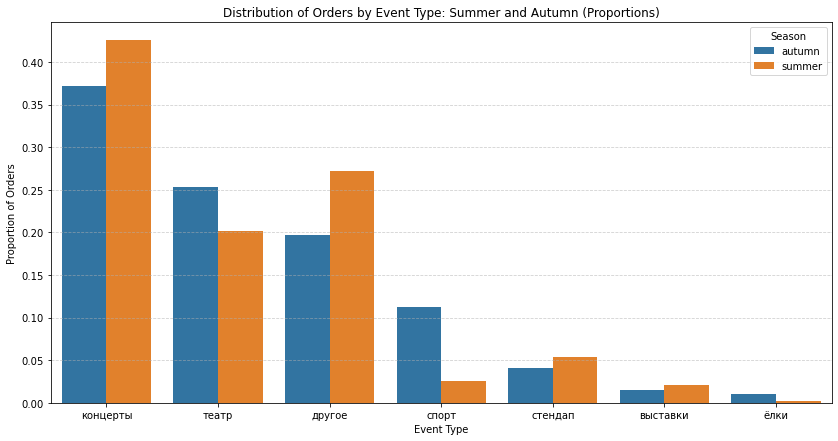

In [29]:
# For autumn and summer periods, compare the distribution of ticket orders by different categories

# Comparison of order distribution by event type

# Group, count unique orders, and calculate proportions
event_type_comparison = df_fin.groupby(['season', 'event_type_main']).agg(
    order_count=('order_id', 'nunique')
).reset_index()

# Calculate the proportion of each event type within the season
event_type_comparison['proportion'] = event_type_comparison.groupby('season')['order_count'].transform(lambda x: x / x.sum())

# Sort for better visualization
event_type_comparison.sort_values(by=['season', 'proportion'], ascending=[True, False], inplace=True)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=event_type_comparison,
    x='event_type_main',
    y='proportion',
    hue='season'
)
plt.title('Distribution of Orders by Event Type: Summer and Autumn (Proportions)')
plt.xlabel('Event Type')
plt.ylabel('Proportion of Orders')
plt.legend(title='Season')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Conclusion:
In autumn, there was an increase in the proportion of orders in the **theater, sport, and "Yolki" (New Year trees/shows)** categories, while the proportion of all other event categories decreased during this period.

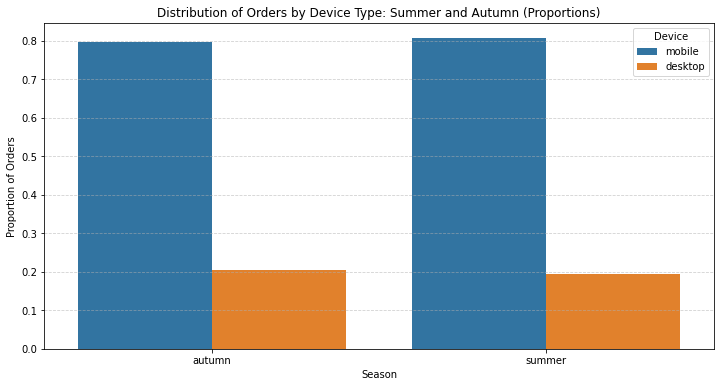

In [30]:
# Comparison of order distribution by device type

# Group, count unique orders, and calculate proportions
device_type_comparison = df_fin.groupby(['season', 'device_type_canonical']).agg(
    order_count=('order_id', 'nunique')
).reset_index()

# Calculate the proportion of each device type within the season
device_type_comparison['proportion'] = device_type_comparison.groupby('season')['order_count'].transform(lambda x: x / x.sum())

# Sort for better visualization
device_type_comparison.sort_values(by=['season', 'proportion'], ascending=[True, False], inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=device_type_comparison,
    x='season',
    y='proportion',
    hue='device_type_canonical'
)
plt.title('Distribution of Orders by Device Type: Summer and Autumn (Proportions)')
plt.xlabel('Season')
plt.ylabel('Proportion of Orders')
plt.legend(title='Device')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Conclusion:
The distribution of order proportions based on device type remained **virtually unchanged** between the summer and autumn periods.

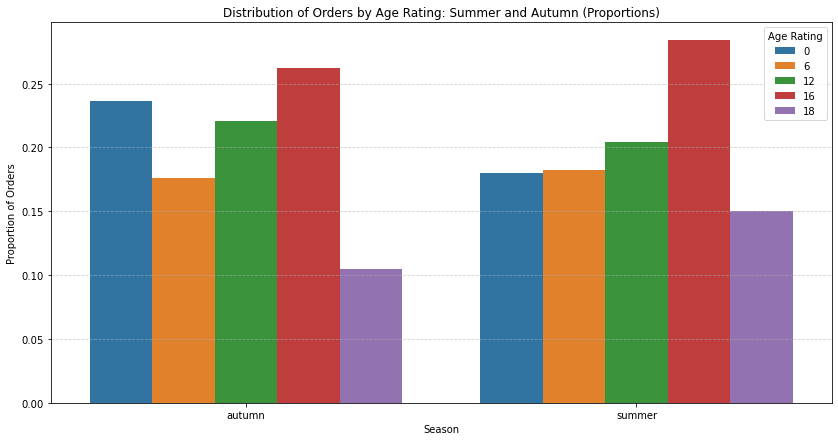

In [31]:
# Comparison of order distribution by age rating

# Group, count unique orders, and calculate proportions
age_type_comparison = df_fin.groupby(['season', 'age_limit']).agg(
    order_count=('order_id', 'nunique')
).reset_index()

# Calculate the proportion of each event type within the season
age_type_comparison['proportion'] = age_type_comparison.groupby('season')['order_count'].transform(lambda x: x / x.sum())

# Sort for better visualization
age_type_comparison.sort_values(by=['season', 'proportion'], ascending=[True, False], inplace=True)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=age_type_comparison,
    x='season',
    y='proportion',
    hue='age_limit'
)
plt.title('Distribution of Orders by Age Rating: Summer and Autumn (Proportions)')
plt.xlabel('Season')
plt.ylabel('Proportion of Orders')
plt.legend(title='Age Rating')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Conclusion:
In the autumn period, the proportion of events with **no age restrictions (0+) and 12+ increased**. For all other events (6+, 16+, and 18+), the proportion decreased during the autumn.


Average revenue per ticket by event type and season
season           autumn  summer
event_type_main                
выставки          90.60   86.42
другое            76.12   77.43
концерты         268.03  302.58
спорт             49.97   50.76
стендап          231.12  218.52
театр            175.97  214.14
ёлки             229.59  271.44

Relative change in average revenue per ticket in % (autumn compared to summer)
event_type_main
выставки     4.85
другое      -1.70
концерты   -11.42
спорт       -1.56
стендап      5.77
театр      -17.82
ёлки       -15.42
dtype: float64


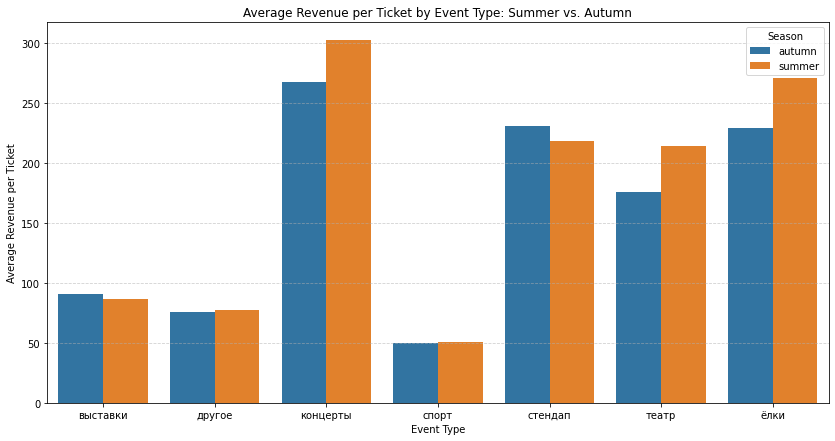

In [32]:
# Examine the change in revenue from selling one ticket depending on the event type in summer and autumn

# Find the average revenue per ticket for each event type in each season
avg_revenue_per_ticket = df_fin.groupby(['season', 'event_type_main']).agg(
    avg_price=('one_ticket_revenue_rub', 'mean')
).reset_index()

# For easier comparison, transform into a pivot table
pivot_avg_price = avg_revenue_per_ticket.pivot_table(
    index='event_type_main',
    columns='season',
    values='avg_price'
)

# Calculate the relative change of autumn values compared to summer values
summer_prices = pivot_avg_price['summer']
autumn_prices = pivot_avg_price['autumn']

relative_change = ((autumn_prices - summer_prices) / summer_prices) * 100

print("\nAverage revenue per ticket by event type and season")
print(pivot_avg_price.round(2))

print("\nRelative change in average revenue per ticket in % (autumn compared to summer)")
print(relative_change.round(2))

# Visualization: Comparison of average ticket price by season
plt.figure(figsize=(14, 7))
sns.barplot(
    data=avg_revenue_per_ticket,
    x='event_type_main',
    y='avg_price',
    hue='season',
)
plt.title('Average Revenue per Ticket by Event Type: Summer vs. Autumn')
plt.xlabel('Event Type')
plt.ylabel('Average Revenue per Ticket')
plt.legend(title='Season')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Conclusion: 
During the autumn period, the average cost of a single ticket decreased in the following event categories: concerts, theater, and Christmas trees. In other categories, the price either remained almost unchanged or slightly increased for the stand-up category.

#### Interim Conclusion: 
A clear seasonality is observed in the presented data. During the autumn period:
- the total number of orders increased, as did the share of orders in the theater, sports, and Christmas tree categories, and the share of events without age restrictions and 12+ events.
- the average cost of a single ticket decreased in the concert, theater, and Christmas tree categories (for other categories, the price change was insignificant in almost all cases).

### 3.2. Autumn User Activity

Let's examine user activity in the autumn of 2024. We'll analyze the daily dynamics for:
- total number of orders;
- number of active users (DAU);
- average number of orders per user;
- average cost per ticket.

In [33]:
# Filter data for autumn 2024
autumn_2024_df = df_fin[(df_fin['season'] == 'autumn')].copy()

# Create a pivot table by day
daily_activity = autumn_2024_df.groupby('created_dt_msk').agg(
    total_orders=('order_id', 'nunique'), # Total number of unique orders
    dau=('user_id', 'nunique'),           # Number of unique users (DAU)
    total_revenue=('revenue_rub', 'sum'), # Total revenue for calculating average ticket price
    total_tickets_count=('tickets_count', 'sum') # Total number of tickets for calculating average ticket price
).reset_index()

# Calculate the average number of orders per user (APPO - Average Orders Per Person)
daily_activity['orders_per_user'] = daily_activity['total_orders'] / daily_activity['dau']
# Calculate the average cost per ticket
daily_activity['avg_ticket_price'] = daily_activity['total_revenue'] / daily_activity['total_tickets_count']

# Add day of the week for further cyclicity analysis
daily_activity['day_of_week'] = pd.to_datetime(daily_activity['created_dt_msk']).dt.day_name()

# Sort for correct display
daily_activity = daily_activity.sort_values(by='created_dt_msk')

daily_activity.head()

,created_dt_msk,total_orders,dau,total_revenue,total_tickets_count,orders_per_user,avg_ticket_price,day_of_week
0,2024-09-01,1327,564,7.262059e+05,3718.0,2.352837,195.321654,Sunday
1,2024-09-02,1380,574,7.035384e+05,3704.0,2.404181,189.940163,Monday
2,2024-09-03,5111,778,1.151204e+06,15290.0,6.569409,75.291326,Tuesday
3,2024-09-04,1772,685,8.570910e+05,4800.0,2.586861,178.560628,Wednesday
4,2024-09-05,1944,739,9.894134e+05,5214.0,2.630582,189.760908,Thursday


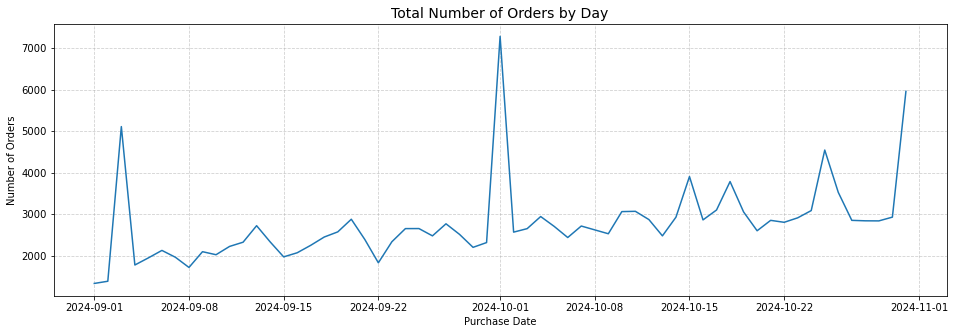

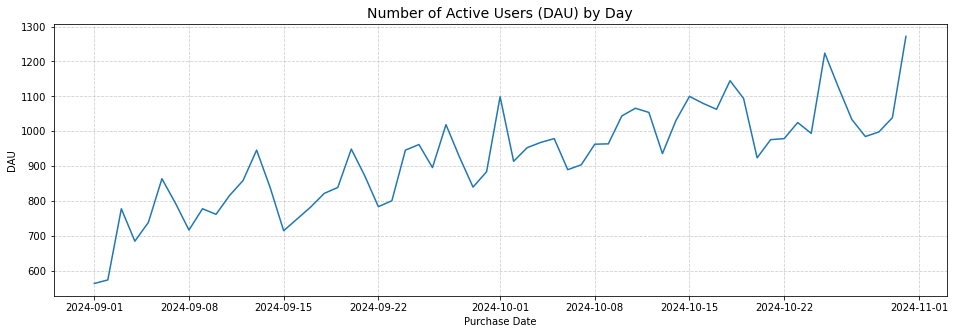

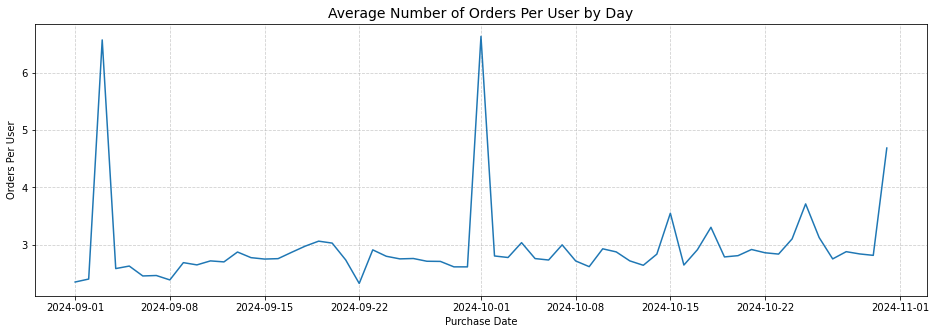

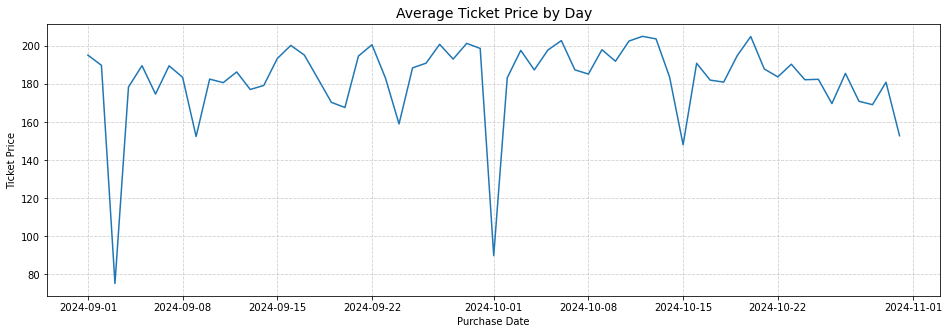

In [34]:
# Daily Dynamics Visualization

# Plot 1: Dynamics of total orders
plt.figure(figsize=(16, 5))
sns.lineplot(x='created_dt_msk', y='total_orders', data=daily_activity)
plt.title('Total Number of Orders by Day', fontsize=14)
plt.xlabel('Purchase Date')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 2: DAU Dynamics
plt.figure(figsize=(16, 5))
sns.lineplot(x='created_dt_msk', y='dau', data=daily_activity)
plt.title('Number of Active Users (DAU) by Day', fontsize=14)
plt.xlabel('Purchase Date')
plt.ylabel('DAU')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 3: Dynamics of average orders per user
plt.figure(figsize=(16, 5))
sns.lineplot(x='created_dt_msk', y='orders_per_user', data=daily_activity)
plt.title('Average Number of Orders Per User by Day', fontsize=14)
plt.xlabel('Purchase Date')
plt.ylabel('Orders Per User')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 4: Dynamics of average ticket price
plt.figure(figsize=(16, 5))
sns.lineplot(x='created_dt_msk', y='avg_ticket_price', data=daily_activity)
plt.title('Average Ticket Price by Day', fontsize=14)
plt.xlabel('Purchase Date')
plt.ylabel('Ticket Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### Conclusion: 
 In the autumn of 2024, a positive trend is observed: the total number of orders and the number of active users are gradually increasing. The average number of orders per user remains stable, with peaks on certain days. The average ticket price fluctuates but does not show a clear trend.

In [35]:
# Let's examine changes in weekly cyclicity

# Define weekdays and weekends
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity['day_type'] = daily_activity['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Aggregate by day of the week and day type
weekly_cyclicity = daily_activity.groupby('day_of_week').agg(
    avg_total_orders=('total_orders', 'mean'),
    avg_dau=('dau', 'mean'),
    avg_orders_per_user=('orders_per_user', 'mean'),
    avg_ticket_price=('avg_ticket_price', 'mean')
).reindex(weekday_order) # Reorder days of the week

print("\nWeekly activity cyclicity (average values by day of the week)")
print(weekly_cyclicity.round(2))

# Comparison of weekdays and weekends
weekday_weekend_comparison = daily_activity.groupby('day_type').agg(
    avg_total_orders=('total_orders', 'mean'),
    avg_dau=('dau', 'mean'),
    avg_orders_per_user=('orders_per_user', 'mean'),
    avg_ticket_price=('avg_ticket_price', 'mean')
)
print("\nComparison of activity on weekdays and weekends")
print(weekday_weekend_comparison.round(2))


Weekly activity cyclicity (average values by day of the week)
             avg_total_orders  avg_dau  avg_orders_per_user  avg_ticket_price
day_of_week                                                                  
Monday                2390.11   853.56                 2.78            183.93
Tuesday               3497.67   934.22                 3.72            154.35
Wednesday             2542.00   923.00                 2.75            186.13
Thursday              3018.44   962.11                 3.06            182.80
Friday                3103.00  1022.62                 3.00            184.36
Saturday              2666.62   960.62                 2.76            190.64
Sunday                2154.22   822.67                 2.60            196.93

Comparison of activity on weekdays and weekends
          avg_total_orders  avg_dau  avg_orders_per_user  avg_ticket_price
day_type                                                                  
Weekday            2905.86   937.20 

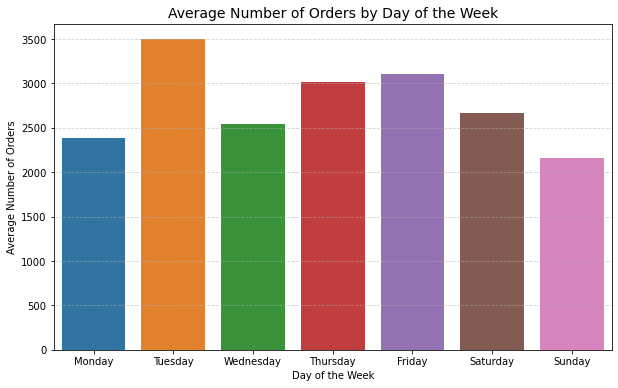

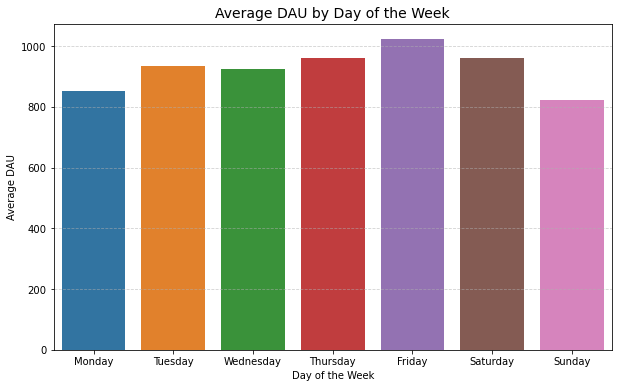

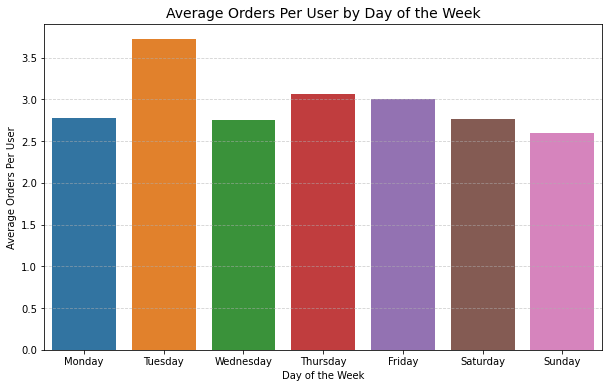

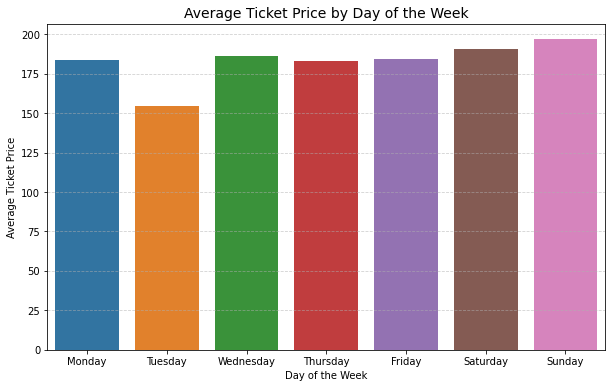

In [36]:
# Plot 1: Average number of orders by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_cyclicity.index, y='avg_total_orders', data=weekly_cyclicity)
plt.title('Average Number of Orders by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Average DAU by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_cyclicity.index, y='avg_dau', data=weekly_cyclicity)
plt.title('Average DAU by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average DAU')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Plot 3: Average orders per user by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_cyclicity.index, y='avg_orders_per_user', data=weekly_cyclicity)
plt.title('Average Orders Per User by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Orders Per User')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Plot 4: Average ticket price by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_cyclicity.index, y='avg_ticket_price', data=weekly_cyclicity)
plt.title('Average Ticket Price by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Ticket Price')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Conclusion: 
- The daily line graphs show a **growing trend in daily active users (DAU)** and a slight increase in the **overall number of daily orders**. For other metrics (average orders per user and average ticket price), while there are significant peaks and dips, the metrics remain **stable on average** throughout the observed autumn period.
- In terms of **weekly activity**, it's noticeable that the **average number of orders and orders per user peak on Tuesdays**. However, on this same day, the **average ticket price is at its lowest**. Otherwise, no strong changes in metrics are observed based on the day of the week.
- A clear **weekday rhythm** is evident, with Monday to Friday showing the **highest activity**, while weekends (Saturday and especially Sunday) are characterized by a **decline in activity**. The increased activity on Tuesday might be linked to delayed orders after the weekend or to users' internal habits (e.g., weekly planning or purchasing).

### 3.3. Popular Events and Partners

- Let's look at how events are distributed by region and partner. This will help us identify key regions and partners that contribute most to revenue.
- For each ticket partner, we'll calculate the total number of unique events, processed orders, and total revenue from ticket orders. We'll focus on the most active partners.

In [37]:
# For each region, let's count the unique number of events and the total number of orders
region_activity = autumn_2024_df.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'nunique')
).reset_index()

total_unique_events = region_activity['unique_events'].sum()
total_orders_global = region_activity['total_orders'].sum()

region_activity['event_share'] = region_activity['unique_events'] / total_unique_events
region_activity['order_share'] = region_activity['total_orders'] / total_orders_global

region_activity = region_activity.sort_values(by='total_orders', ascending=False) 

region_activity.round(2)

,region_name,unique_events,total_orders,event_share,order_share
23,Каменевский регион,3910,46684,0.25,0.28
59,Североярская область,2613,20718,0.16,0.12
41,Медовская область,369,12044,0.02,0.07
75,Широковская область,803,8715,0.05,0.05
44,Озернинский край,296,7480,0.02,0.04
...,...,...,...,...,...
47,Островогорский округ,4,18,0.00,0.00
78,Яснопольский округ,5,18,0.00,0.00
32,Крутоводский регион,5,14,0.00,0.00
5,Верхозёрский край,2,11,0.00,0.00


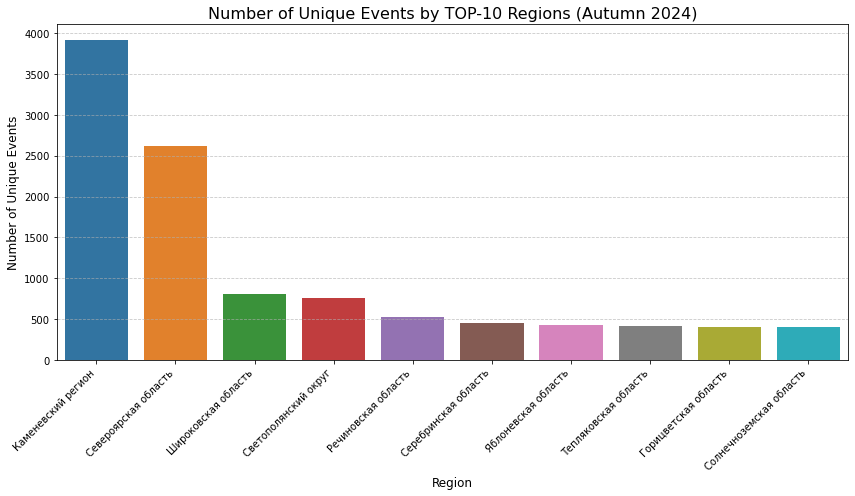

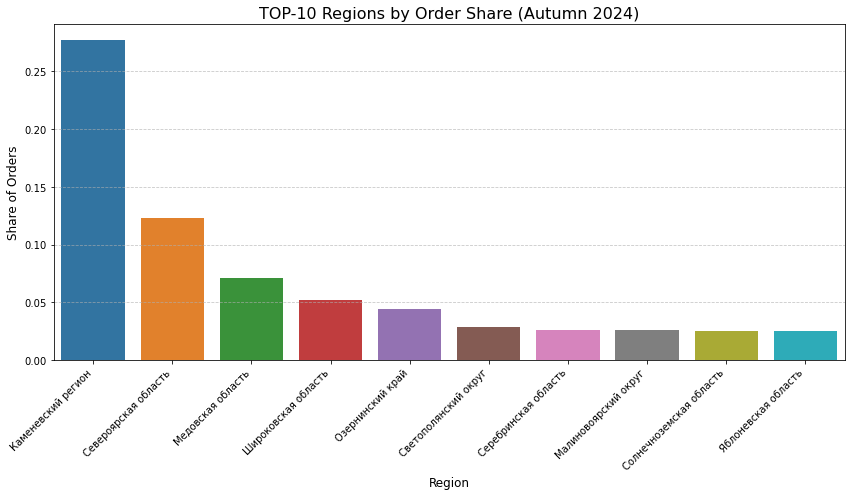

In [38]:
# Let's look at the TOP-10 regions by the number of unique events
top10_regions_events = region_activity.sort_values(by='unique_events', ascending=False).head(10)

# Visualize the distribution of events by region
plt.figure(figsize=(12, 7)) 
sns.barplot(x='region_name', y='unique_events', data=top10_regions_events)
plt.title('Number of Unique Events by TOP-10 Regions (Autumn 2024)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Unique Events', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Let's look at the TOP-10 regions by order share
top10_regions_orders = region_activity.sort_values(by='order_share', ascending=False).head(10)

# Visualize the share of orders by region
plt.figure(figsize=(12, 7)) 
sns.barplot(x='region_name', y='order_share', data=top10_regions_orders)
plt.title('TOP-10 Regions by Order Share (Autumn 2024)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Share of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

##### Conclusion:
The largest number of unique events (both in absolute and relative terms) falls within Kamenevsky District and Severoyarskaya Oblast.

In [39]:
# Analysis by ticket partners
partner_activity = autumn_2024_df.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    processed_orders=('order_id', 'nunique'),
    total_revenue=('revenue_rub', 'sum')
).reset_index()

total_partner_events = partner_activity['unique_events'].sum()
total_processed_orders = partner_activity['processed_orders'].sum()
total_partner_revenue = partner_activity['total_revenue'].sum()

partner_activity['event_share'] = partner_activity['unique_events'] / total_partner_events
partner_activity['order_share'] = partner_activity['processed_orders'] / total_processed_orders
partner_activity['revenue_share'] = partner_activity['total_revenue'] / total_partner_revenue

partner_activity = partner_activity.sort_values(by='unique_events', ascending=False)

partner_activity.round(2)

,service_name,unique_events,processed_orders,total_revenue,event_share,order_share,revenue_share
21,Лови билет!,3616,25792,10376793.48,0.21,0.15,0.13
3,Билеты без проблем,2847,32383,12116005.15,0.16,0.19,0.15
5,Билеты в руки,2469,25728,7613383.38,0.14,0.15,0.09
25,Облачко,1409,15478,10611051.69,0.08,0.09,0.13
22,Лучшие билеты,1396,12432,1676010.07,0.08,0.07,0.02
24,Мой билет,1005,19410,10830059.33,0.06,0.12,0.13
30,Тебе билет!,859,3749,2137900.34,0.05,0.02,0.03
26,Прачечная,728,5798,2548310.47,0.04,0.03,0.03
8,Весь в билетах,599,9406,9325570.66,0.03,0.06,0.11
34,Яблоко,537,3473,2763332.31,0.03,0.02,0.03


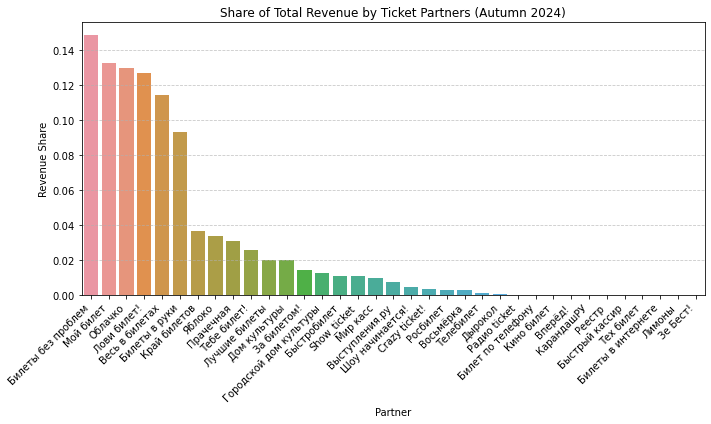

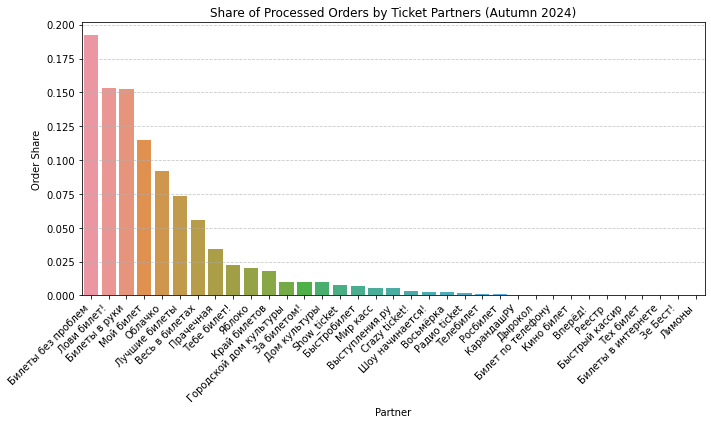

In [40]:
# Sort the chart by decreasing revenue share
partner_activity_revenue_share = partner_activity.sort_values(by='revenue_share', ascending=False)

# Visualize revenue share by partners
plt.figure(figsize=(10, 6))
sns.barplot(x='service_name', y='revenue_share', data=partner_activity_revenue_share)
plt.title('Share of Total Revenue by Ticket Partners (Autumn 2024)')
plt.xlabel('Partner')
plt.ylabel('Revenue Share')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Sort the chart by decreasing processed order share
partner_activity_order_share = partner_activity.sort_values(by='order_share', ascending=False)

# Visualize processed order share by partners
plt.figure(figsize=(10, 6))
sns.barplot(x='service_name', y='order_share', data=partner_activity_order_share)
plt.title('Share of Processed Orders by Ticket Partners (Autumn 2024)')
plt.xlabel('Partner')
plt.ylabel('Order Share')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Conclusion
- The partners "**Lovi Bilet!**" (Catch a Ticket!) and "**Bilety Bez Problem**" (Tickets Without Problems) are the **absolute leaders** in both the number of unique events and their share of total revenue and processed orders.
- Additionally, the share of total revenue is high for partners "**Oblachko**" (Little Cloud), "**Moy Bilet**" (My Ticket), and "**Ves v Biletakh**" (All in Tickets), even though their number of events and share of processed orders are somewhat lower than the top partners.

--- 
## Step 4. Statistical Data Analysis 

Using data from the autumn period, we'll test two hypotheses proposed by colleagues from the product department, which suggest greater activity among mobile device users (compared to desktop users): 

1) The average number of orders per mobile app user is higher compared to desktop users. 

2) The average time between orders for mobile app users is higher compared to desktop users.


In [41]:
# Separate data by device type
mobile_df = autumn_2024_df[autumn_2024_df['device_type_canonical'] == 'mobile'].copy()
desktop_df = autumn_2024_df[autumn_2024_df['device_type_canonical'] == 'desktop'].copy()

print(f"Number of records for mobile devices: {len(mobile_df)}")
print(f"Number of records for desktop devices: {len(desktop_df)}")

# Check for overlapping user_id's
mobile_users = set(mobile_df['user_id'].unique())
desktop_users = set(desktop_df['user_id'].unique())

common_users = mobile_users.intersection(desktop_users)

if common_users:
    print(f"ATTENTION! {len(common_users)} users were found who made orders from both mobile and desktop devices during the autumn period.")
    # Remove these users from both groups
    mobile_df_new = mobile_df[~mobile_df['user_id'].isin(common_users)].copy()
    desktop_df_new = desktop_df[~desktop_df['user_id'].isin(common_users)].copy()
    print(f"Number of records for mobile devices (after removing overlapping users): {len(mobile_df_new)}")
    print(f"Percentage of removed records for mobile devices: {(len(mobile_df) - len(mobile_df_new)) * 100 / len(mobile_df):.2f}")
    print(f"Number of records for desktop devices (after removing overlapping users): {len(desktop_df_new)}")
    print(f"Percentage of removed records for desktop devices: {(len(desktop_df) - len(desktop_df_new)) * 100 / len(desktop_df):.2f}")
else:
    print("\nCheck passed: No overlapping users found in groups. Filtering is not required.")

Number of records for mobile devices: 134283
Number of records for desktop devices: 34296
ATTENTION! 3248 users were found who made orders from both mobile and desktop devices during the autumn period.
Number of records for mobile devices (after removing overlapping users): 31268
Percentage of removed records for mobile devices: 76.71
Number of records for desktop devices (after removing overlapping users): 3198
Percentage of removed records for desktop devices: 90.68


As a result, a significantly large number of records were removed (more than 76% of rows for mobile devices and more than 90% of rows for desktop devices). 

Unfortunately, without this step, it's impossible to obtain independent samples, which is a critical criterion for most statistical tests.

If the hypothesis were formulated as "during sessions from different devices, the average number of orders/order time differed...", these records could have been kept. However, since we are analyzing users, sample independence is a critical factor in this case.

In [42]:
# Metric 1: Orders per user
# Group by user_id and count the number of unique order_id for each user
orders_per_user_mobile = mobile_df_new.groupby('user_id')['order_id'].nunique()
orders_per_user_desktop = desktop_df_new.groupby('user_id')['order_id'].nunique()

print(f"Average number of orders per user (Mobile): {orders_per_user_mobile.mean():.2f}")
print(f"Average number of orders per user (Desktop): {orders_per_user_desktop.mean():.2f}")

# Metric 2: Time between orders
time_diffs_mobile = mobile_df_new['days_since_prev'].dropna()
time_diffs_desktop = desktop_df_new['days_since_prev'].dropna()

print(f"\nAverage time between orders (Mobile): {time_diffs_mobile.mean():.2f} days")
print(f"Average time between orders (Desktop): {time_diffs_desktop.mean():.2f} days")

print(f"\nSample size 'Orders_Mobile' (users): {len(orders_per_user_mobile)}")
print(f"Sample size 'Orders_Desktop' (users): {len(orders_per_user_desktop)}")
print(f"Sample size 'Time_between_orders_Mobile': {len(time_diffs_mobile)}")
print(f"Sample size 'Time_between_orders_Desktop': {len(time_diffs_desktop)}")

Average number of orders per user (Mobile): 2.86
Average number of orders per user (Desktop): 1.97

Average time between orders (Mobile): 13.79 days
Average time between orders (Desktop): 18.07 days

Sample size 'Orders_Mobile' (users): 10940
Sample size 'Orders_Desktop' (users): 1620
Sample size 'Time_between_orders_Mobile': 24586
Sample size 'Time_between_orders_Desktop': 2079


<b> Rationale for Statistical Test Selection: </b> 

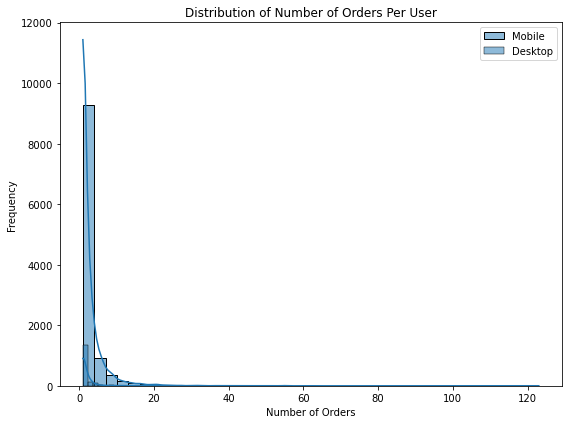

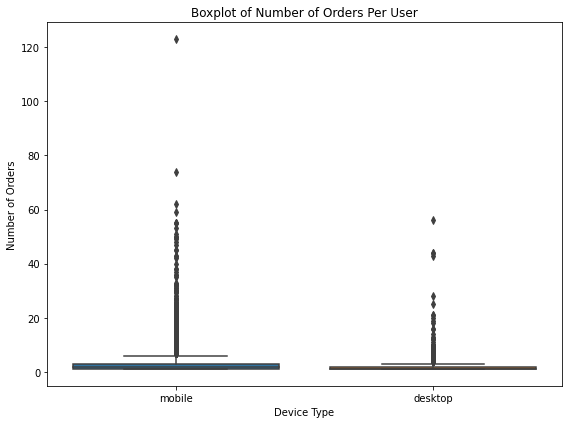

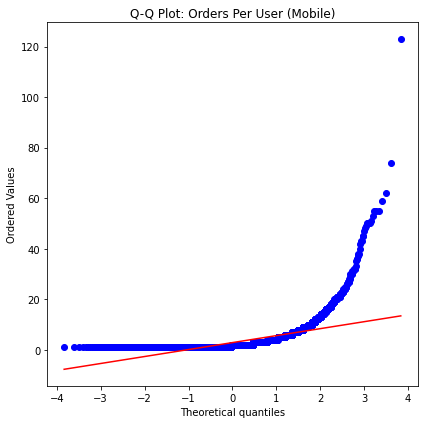

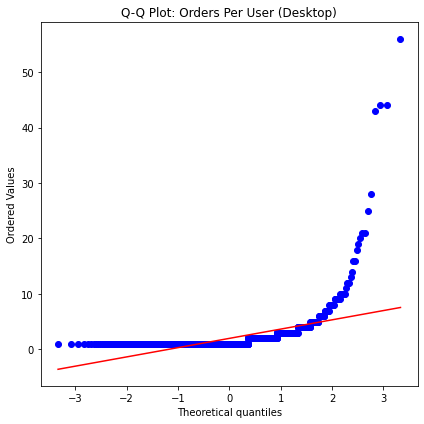

In [43]:
# Distribution of orders per user
# Histogram: Number of orders per user (Mobile vs. Desktop)
plt.figure(figsize=(8, 6))
sns.histplot(orders_per_user_mobile, kde=True, label='Mobile', bins=40)
sns.histplot(orders_per_user_desktop, kde=True, label='Desktop', bins=40)
plt.title('Distribution of Number of Orders Per User')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot: Number of orders per user (Mobile vs. Desktop)
plt.figure(figsize=(8, 6))
temp_orders_df = pd.DataFrame({
    'orders_count': pd.concat([orders_per_user_mobile, orders_per_user_desktop]),
    'device_type': ['mobile'] * len(orders_per_user_mobile) + ['desktop'] * len(orders_per_user_desktop)
})
sns.boxplot(x='device_type', y='orders_count', data=temp_orders_df)
plt.title('Boxplot of Number of Orders Per User')
plt.xlabel('Device Type')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Q-Q plot: Orders per user (Mobile)
plt.figure(figsize=(6, 6))
stats.probplot(orders_per_user_mobile, dist="norm", plot=plt)
plt.title('Q-Q Plot: Orders Per User (Mobile)')
plt.tight_layout()
plt.show()

# Q-Q plot: Orders per user (Desktop)
plt.figure(figsize=(6, 6))
stats.probplot(orders_per_user_desktop, dist="norm", plot=plt)
plt.title('Q-Q Plot: Orders Per User (Desktop)')
plt.tight_layout()
plt.show()

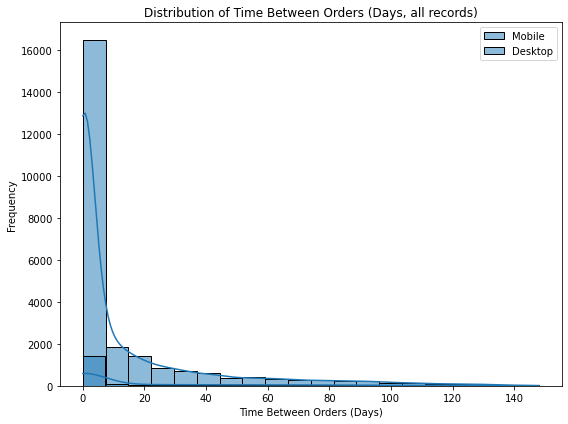

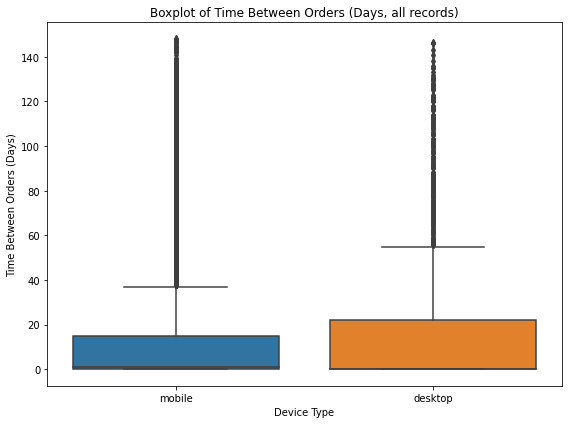

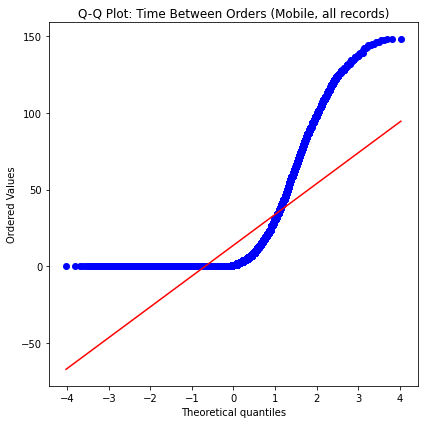

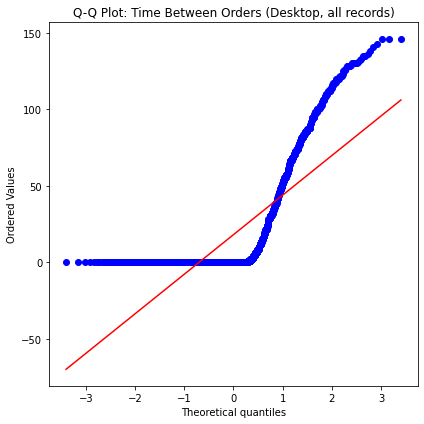

In [44]:
# Distribution of time between orders
# Histogram: Time between orders (Mobile vs. Desktop, all records)
plt.figure(figsize=(8, 6))
sns.histplot(time_diffs_mobile, kde=True, label='Mobile', bins=20)
sns.histplot(time_diffs_desktop, kde=True, label='Desktop', bins=20)
plt.title('Distribution of Time Between Orders (Days, all records)')
plt.xlabel('Time Between Orders (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot: Time between orders (Mobile vs. Desktop, all records) 
plt.figure(figsize=(8, 6))
temp_time_df = pd.DataFrame({
    'time_diff': pd.concat([time_diffs_mobile, time_diffs_desktop]),
    'device_type': ['mobile'] * len(time_diffs_mobile) + ['desktop'] * len(time_diffs_desktop)
})
sns.boxplot(x='device_type', y='time_diff', data=temp_time_df)
plt.title('Boxplot of Time Between Orders (Days, all records)')
plt.xlabel('Device Type')
plt.ylabel('Time Between Orders (Days)')
plt.tight_layout()
plt.show()

# Q-Q plot: Time between orders (Mobile, all records)
plt.figure(figsize=(6, 6))
stats.probplot(time_diffs_mobile, dist="norm", plot=plt)
plt.title('Q-Q Plot: Time Between Orders (Mobile, all records)')
plt.tight_layout()
plt.show()

# Q-Q plot: Time between orders (Desktop, all records) 
plt.figure(figsize=(6, 6))
stats.probplot(time_diffs_desktop, dist="norm", plot=plt)
plt.title('Q-Q Plot: Time Between Orders (Desktop, all records)')
plt.tight_layout()
plt.show()

In [45]:
# Perform normality tests (Shapiro-Wilk) 

alpha = 0.05 # Significance level

# For orders per user
shapiro_mobile_orders = stats.shapiro(orders_per_user_mobile)
shapiro_desktop_orders = stats.shapiro(orders_per_user_desktop)

# For time between orders 
shapiro_mobile_time = stats.shapiro(time_diffs_mobile)
shapiro_desktop_time = stats.shapiro(time_diffs_desktop)

print(f"Shapiro-Wilk for 'Orders per user (Mobile)': p-value = {shapiro_mobile_orders.pvalue:.4f}")
if shapiro_mobile_orders.pvalue < alpha:
    print("Distribution is not normal (reject H0)")
else:
    print("Distribution is normal (fail to reject H0)")

print(f"Shapiro-Wilk for 'Orders per user (Desktop)': p-value = {shapiro_desktop_orders.pvalue:.4f}")
if shapiro_desktop_orders.pvalue < alpha:
    print("Distribution is not normal (reject H0)")
else:
    print("Distribution is normal (fail to reject H0)")

print(f"Shapiro-Wilk for 'Time between orders (Mobile, all records)': p-value = {shapiro_mobile_time.pvalue:.4f}")
if shapiro_mobile_time.pvalue < alpha:
    print("Distribution is not normal (reject H0)")
else:
    print("Distribution is normal (fail to reject H0)")

print(f"Shapiro-Wilk for 'Time between orders (Desktop, all records)': p-value = {shapiro_desktop_time.pvalue:.4f}")
if shapiro_desktop_time.pvalue < alpha:
    print("Distribution is not normal (reject H0)")
else:
    print("Distribution is normal (fail to reject H0)")

Shapiro-Wilk for 'Orders per user (Mobile)': p-value = 0.0000
Distribution is not normal (reject H0)
Shapiro-Wilk for 'Orders per user (Desktop)': p-value = 0.0000
Distribution is not normal (reject H0)
Shapiro-Wilk for 'Time between orders (Mobile, all records)': p-value = 0.0000
Distribution is not normal (reject H0)
Shapiro-Wilk for 'Time between orders (Desktop, all records)': p-value = 0.0000
Distribution is not normal (reject H0)


/Users/nataliya/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
# Levene's test for equality of variances

# For orders per user
levene_orders = stats.levene(orders_per_user_mobile, orders_per_user_desktop)

# For time between orders (all records)
levene_time_diff = stats.levene(time_diffs_mobile, time_diffs_desktop)

print(f"Levene's test for 'Number of orders per user': p-value = {levene_orders.pvalue:.4f}")
if levene_orders.pvalue < alpha:
    print("Variances are NOT equal (reject H0: equal variances)")
    equal_var_orders = False
else:
    print("Variances are equal (fail to reject H0: equal variances)")
    equal_var_orders = True

print(f"Levene's test for 'Time between orders (all records)': p-value = {levene_time_diff.pvalue:.4f}")
if levene_time_diff.pvalue < alpha:
    print("Variances are NOT equal (reject H0)")
    equal_var_time_diff = False
else:
    print("Variances are equal (fail to reject H0)")
    equal_var_time_diff = True

Levene's test for 'Number of orders per user': p-value = 0.0000
Variances are NOT equal (reject H0: equal variances)
Levene's test for 'Time between orders (all records)': p-value = 0.0000
Variances are NOT equal (reject H0)


##### Conclusion:

The histograms, Boxplots, and Q-Q plots clearly show that the distribution of both metrics **deviates significantly from a normal distribution**. This is further confirmed by the **Shapiro-Wilk tests**.

Therefore, the **Mann-Whitney U-test** is required for analysis, because:
- The data is **not normally distributed**.
- The **variances are different**.

<b>Hypothesis 1:</b> 
- H0: The average number of orders per user is no different for mobile app users and desktop users.
- H1: The average number of orders per mobile app user is higher compared to desktop users.

In [47]:
# Metric 1: Orders per user
orders_per_user_mobile = mobile_df_new.groupby('user_id')['order_id'].nunique()
orders_per_user_desktop = desktop_df_new.groupby('user_id')['order_id'].nunique()

# Perform Mann-Whitney U-test 
stat_mannwhitney_1, p_value_mannwhitney_1 = stats.mannwhitneyu(
    orders_per_user_mobile,
    orders_per_user_desktop,
    alternative='greater'
)
print(f"\nMann-Whitney U-test for Hypothesis 1 (number of orders): Statistic={stat_mannwhitney_1:.2f}, p-value={p_value_mannwhitney_1:.3f}")

alpha = 0.05 # Significance level

if p_value_mannwhitney_1 < alpha:
    print(f"Since p-value ({p_value_mannwhitney_1:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("This means there is statistically significant evidence that the number of orders per mobile app user is higher than for desktop users.")
else:
    print(f"Since p-value ({p_value_mannwhitney_1:.3f}) >= alpha ({alpha}), we do not have enough evidence to reject the null hypothesis.")
    print("This means there is no statistically significant evidence that the number of orders per mobile app user is higher than for desktop users.")


Mann-Whitney U-test for Hypothesis 1 (number of orders): Statistic=10504436.00, p-value=0.000
Since p-value (0.000) < alpha (0.05), we reject the null hypothesis.
This means there is statistically significant evidence that the number of orders per mobile app user is higher than for desktop users.


<b>Hypothesis 2:</b> 
- H0: The average time between orders is no different for mobile app users and desktop users.
- H1: The average time between orders for mobile app users is higher compared to desktop users.

In [48]:
# Hypothesis 2: Average time between orders (based on 'days_since_prev')

# Drop NaNs in 'days_since_prev', as the first purchase for a user won't have a previous one
time_diffs_mobile = mobile_df_new['days_since_prev'].dropna()
time_diffs_desktop = desktop_df_new['days_since_prev'].dropna()

# Perform Mann-Whitney U-test 
stat_mannwhitney_2, p_value_mannwhitney_2 = stats.mannwhitneyu(
    time_diffs_mobile,
    time_diffs_desktop,
    alternative='greater'
)
print(f"\nMann-Whitney U-test for Hypothesis 2 (time between orders): Statistic={stat_mannwhitney_2:.2f}, p-value={p_value_mannwhitney_2:.3f}")

alpha = 0.05 # Significance level

if p_value_mannwhitney_2 < alpha:
    print(f"Since p-value ({p_value_mannwhitney_2:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("This means there is statistically significant evidence that the time between orders for mobile app users is higher than for desktop users.")
else:
    print(f"Since p-value ({p_value_mannwhitney_2:.3f}) >= alpha ({alpha}), we do not have enough evidence to reject the null hypothesis.")
    print("This means there is no statistically significant evidence that the time between orders for mobile app users is higher than for desktop users.")


Mann-Whitney U-test for Hypothesis 2 (time between orders): Statistic=27231119.50, p-value=0.000
Since p-value (0.000) < alpha (0.05), we reject the null hypothesis.
This means there is statistically significant evidence that the time between orders for mobile app users is higher than for desktop users.


#### Conclusion
Based on the results of the statistical analysis:
- **Hypothesis 1 was confirmed**. The average number of orders per mobile app user is higher than for desktop users, and this difference is statistically significant.
- **Hypothesis 2 was confirmed**. The average time between orders for mobile app users is higher than for desktop users, and this difference is statistically significant.

## Step 5. Overall Conclusion and Recommendations

### Data Information

We analyzed 290,849 ticket order records and 22,427 event records from June 1 to October 30, 2024. The data underwent successful preprocessing, including handling missing values and outliers, unifying currency to rubles, and adding aggregated features such as revenue per ticket, month, and seasonality. After preprocessing, 287,499 records were included in the analysis.

### Key Analysis Results

* **Seasonality and Event Popularity:**
    * With the arrival of autumn (September-October), there was an increase in the total number of orders, confirming a seasonal factor.
    * Concerts, theater, and "other" were the most in-demand event types. However, in autumn, the share of theater, sports, and Christmas tree events increased compared to the summer period.
    * The average cost of a single ticket generally decreased in autumn. Across different event categories, the dynamic was as follows: in concert, theater, and Christmas tree categories, the average price decreased; for other categories, the price changed insignificantly, except for stand-up, where the price slightly increased.
    * Regarding age restrictions, events rated 16+ were most popular, though their share decreased in the autumn, while the share of events without age restrictions, conversely, increased.

* **User Activity:**
    * Daily activity analysis showed an increase in the number of unique users (DAU) and a slight rise in the number of orders. All observed metrics displayed notable peaks and troughs.
    * Weekly cyclicity was identified: the average number of orders and orders per user peaked on Tuesdays, but on this day, the average ticket price was also at its minimum.
    * No clear cyclicity was observed for other key metrics (number of orders, DAU, orders per user, average check) based on days of the week.
    * There was some decrease in activity on weekends compared to weekdays. On weekdays, the average number of orders was 2905, unique users 937, and average ticket price 178. On weekends, the average number of orders was 2395, unique users 887, and average ticket price 193.

* **Leaders Among Regions and Partners:**
    * The **Kamenevsky District** and **Severoyarskaya Oblast** were clear leaders in both event diversity and the number of orders, contributing **40% of the total orders**.
    * Among ticket partners, "**Lovi Bilet!**" and "**Bilety Bez Problem**" made the largest contribution to revenue and the number of processed orders. These partners processed **34% of all orders** and generated **28% of the revenue**.

### Hypothesis Testing Results

We tested two hypotheses regarding the activity of mobile and desktop device users based on autumn data. Users who made orders from both device types were excluded to ensure sample independence.

1.  **Hypothesis 1: The average number of orders per mobile app user is higher compared to desktop users.**
    * **P-value:** $0.000$.
    * At a significance level of $\alpha = 0.05$: **REJECT** the null hypothesis.
    * **Conclusion:** There **IS** statistically significant evidence that the average number of orders per **mobile app user is higher** than for desktop users. The average number of orders was 2.86 for mobile and 1.97 for desktop.

2.  **Hypothesis 2: The average time between orders for mobile app users is higher compared to desktop users.**
    * **P-value:** $0.000$.
    * At a significance level of $\alpha = 0.05$: **REJECT** the null hypothesis.
    * **Conclusion:** There **IS** statistically significant evidence that the average time between orders for **mobile app users is higher** than for desktop users. The average time between orders was 13.79 days for mobile and 18.07 days for desktop.

### Recommendations

Based on this analysis, we propose the following recommendations for the product team:

1.  **Leverage seasonality** to optimize marketing campaigns. Given the increase in orders in autumn, intensify advertising efforts during this period, focusing on theater, sports, and Christmas tree events, which showed the highest growth.
2.  **Optimize the experience for desktop users.** Since Hypothesis 1 showed differences in behavior (number of orders per user), focus on improving the conversion funnel or retention for the less active group. For instance, since desktop users make fewer orders, consider simplifying the purchasing process or sending email reminders.
3.  **Maintain strong relationships with leading partners and regions.** Considering their significant contribution to revenue and order volume, explore expanding cooperation or conducting joint promotions with "**Lovi Bilet!**" and "**Bilety Bez Problem**," as well as increasing the number of events in the **Kamenevsky District** and **Severoyarskaya Oblast**.
4.  **Utilize weekly cyclicity.** As weekdays, and Tuesdays in particular, demonstrate higher activity, consider planning promotional launches or intensifying ad messages on this day to maximize this peak in demand.